# Car Price Prediction

###  Introduction
The pricing of cars is influenced by various factors such as their make, model, age, mileage, engine specifications, and features. Predicting the price of a car is a crucial task in the automotive industry, as it helps buyers make informed decisions and sellers price their vehicles competitively. This project aims to build a machine learning model that predicts car prices based on a variety of attributes.

### Objective
The primary objective of this project is to develop a regression model capable of accurately predicting the price of a car given its features. The model will provide valuable insights into the factors influencing car prices, aiding both buyers and sellers in the decision-making process.

### Dataset
The dataset contains the following attributes:

 - Car_Name: The name or model of the car.
 

 - Year: The year the car was manufactured.


 - Selling_Price: The price at which the car is being sold (target variable).


 - Present_Price: The price of the car when it was new.


 - Kms_Driven: The total distance the car has been driven, in kilometers.


 - Fuel_Type: The type of fuel used by the car (e.g., Petrol, Diesel, or CNG).


 - Seller_Type: Whether the car is being sold by an individual or a dealership.


 - Transmission: The type of transmission in the car (e.g., Manual or Automatic).


 - Owner: The number of previous owners the car has had.
 
### Goal
We will perform the following steps to achieve our goal:

1 - Data Exploration: Analyze the dataset to understand the relationships between features and the target variable.

2 - Data Preprocessing: Handle missing values, encode categorical variables, and scale numerical features.

3 - Model Training and Evaluation: Train regression models to predict car prices and evaluate their performance using appropriate metrics.

4 - Hyperparameter Tuning: Fine-tune the model’s parameters to achieve better accuracy.


By the end of this project, I aim to deliver a robust model that accurately predicts car prices and provides meaningful insights into the pricing dynamics of the automotive market.



## Let's Load the data

In [1]:
import pandas as pd

cars = pd.read_csv(r"C:\Users\Yousef Sorour\OneDrive\Desktop\Python folder\AI python projects\car data.csv")

## 1 -  Data Exploration
 - First Let's take a look about the Data Structure 
 - Using `.head()` method to display first 5 rows of the dataset

In [2]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


 - using `.info()` to gain more insights about the data so let's take a look!

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


 - The dataset is great! no missing values are there so we will not put much effort for 'Fill In The Missing Values' :)
 - As we can see the dataset contain numerical attributes labeled 'Dtype = int64 or float64' and categorical attributes

Okay now let's plot a histogram for each numerical attribute !

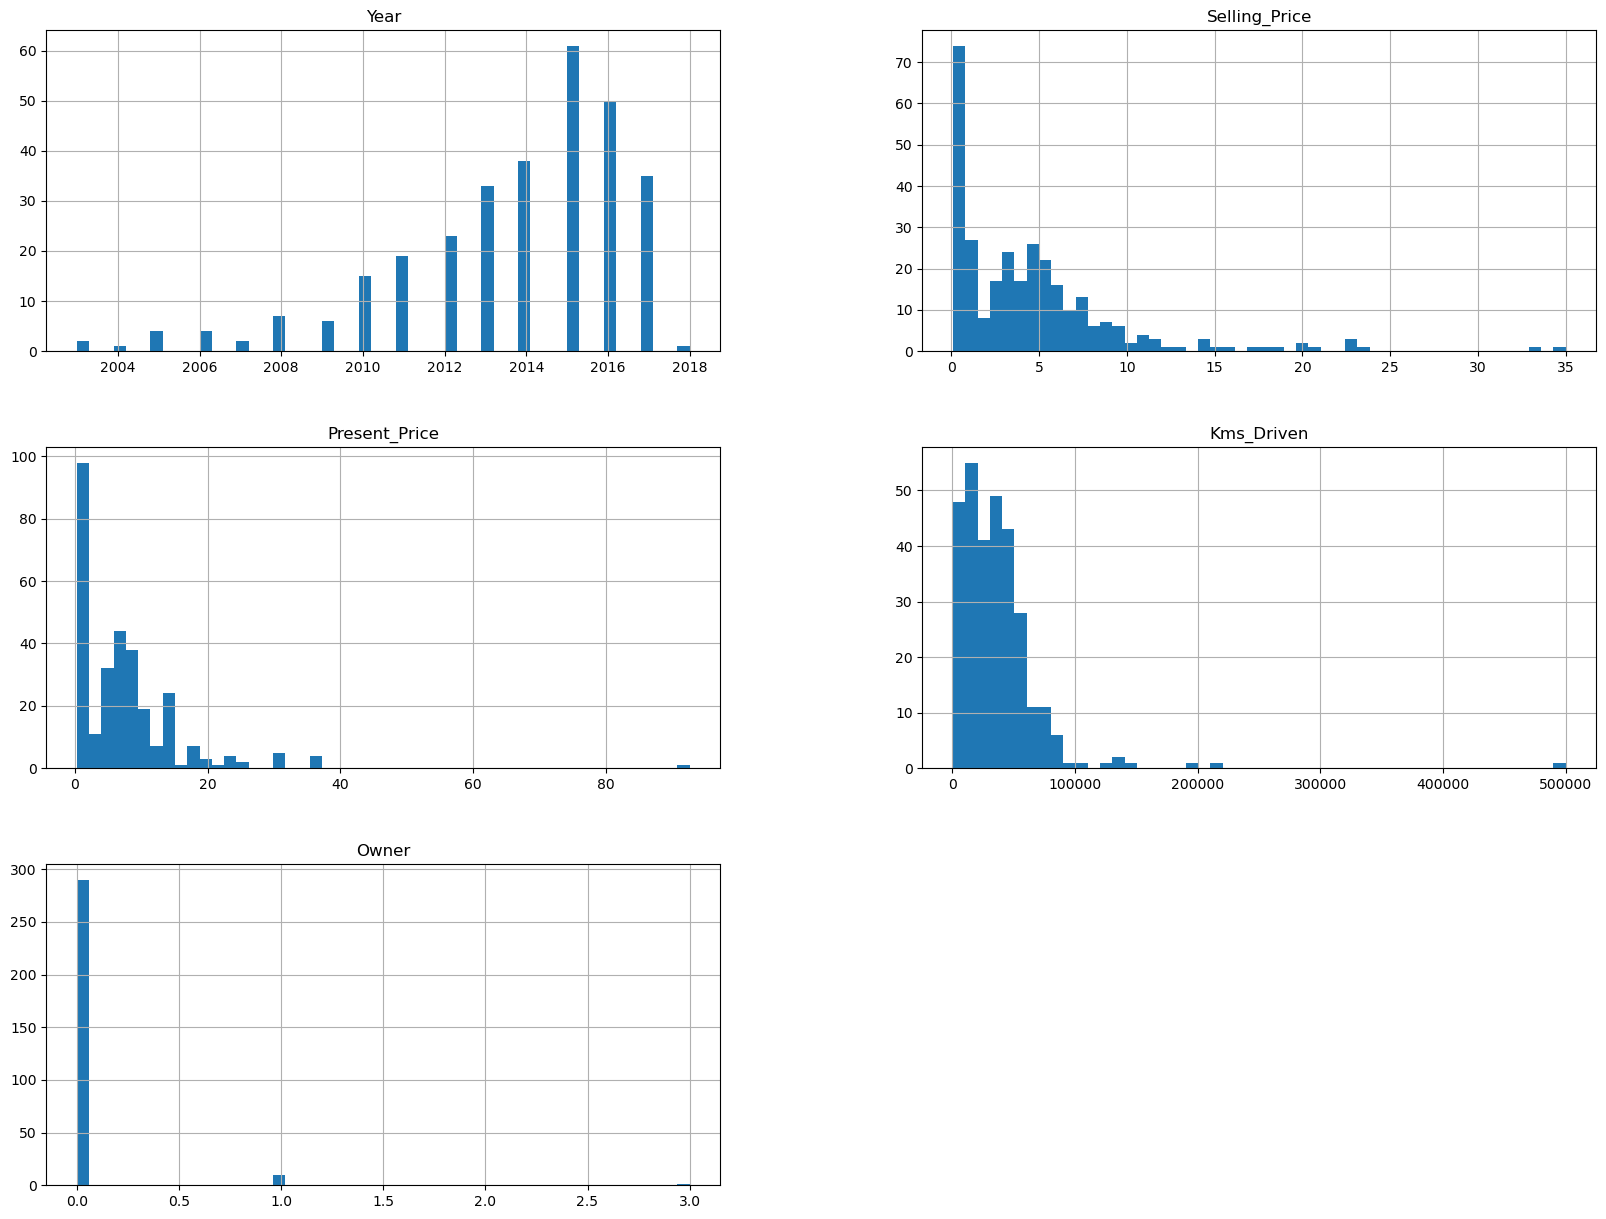

In [4]:
import matplotlib.pyplot as plt

cars.hist(bins=50, figsize=(20,15))
plt.show()

Now We Can understand that in 'selling price' the number of cars decrease as price increases which means:
 - Most of People who have an expensive relatively cars will not want to sell it as it's quality is good 
 - Otherwise people who have simple cars -not expensive- can sell their cars and as you can see most selled cars are in the range of (0.1000 to 5.0000) * e4 

### Let's Create Test set
 - using Scikit-Learn's library `.model_selection` importing `train_test_split` method

In [5]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(cars, test_size=0.1, random_state=42)

### Visualizing Geographical Data

As Kms_driven are very important to predict the price of the car so let's plot a Visualizing Data to gain more insights 

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

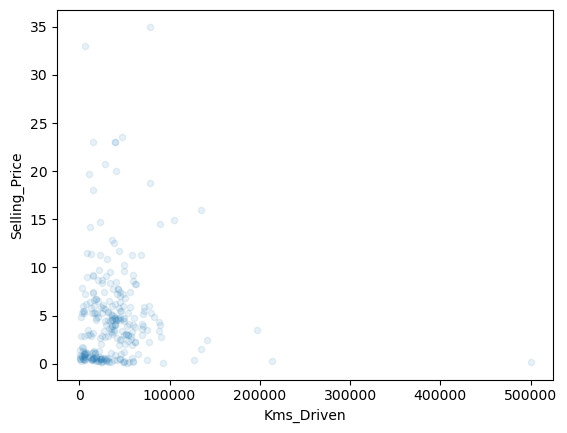

In [6]:
train_set.plot(kind='scatter', x='Kms_Driven', y='Selling_Price', alpha=0.1)

Let's Look at any correlation of the data since the dataset not too large 

### 1. What is Correlation?
Correlation measures the relationship between two variables and tells us how one variable changes in relation to another.

Range of Correlation Values (`r`):
 - `+1`: Perfect positive correlation (as one variable increases, the other increases too).
 - `0`: No correlation (the variables are unrelated).
 - `-1`: Perfect negative correlation (as one variable increases, the other decreases).
 
 #### It is important to Identify which variables are most important for predicting the target variable
 
 so let's have the correlation matrix

In [7]:
corr_matrix = cars.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

C:\Users\Yousef Sorour\AppData\Local\Temp\ipykernel_11908\1378915692.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cars.corr()


Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

As we can see there is a strong positive relation between the Selling price and the present price and very weak relation with Kms driven, that's mean the  Kms drive not as much important as Present price 

#### Lets plot them

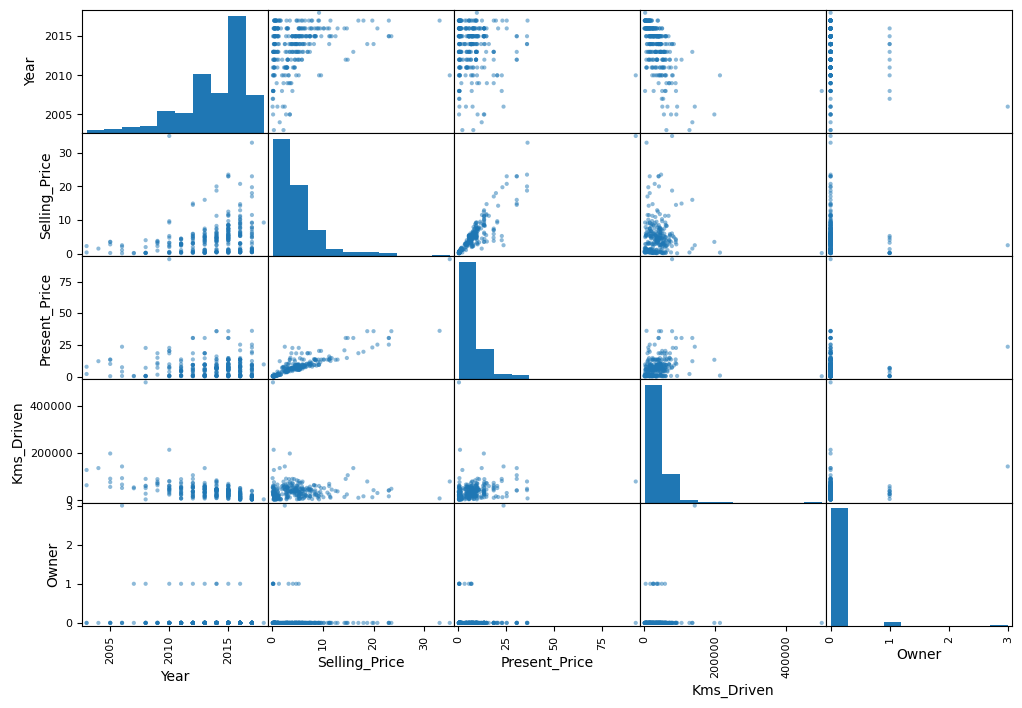

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(cars, figsize=(12,8))
plt.show()

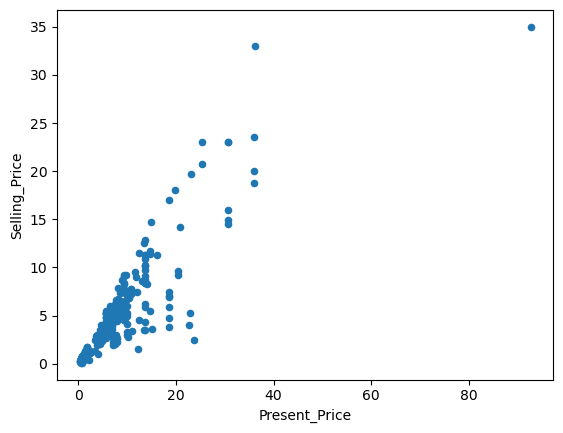

In [9]:
cars.plot(kind='scatter', x='Present_Price', y ='Selling_Price')
plt.show()

Let's Create the train test (x,y) 

In [10]:
cars = train_set.drop('Selling_Price', axis=1)
cars_label = train_set['Selling_Price'].copy()

cars.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
282,city,2014,14.00,63000,Diesel,Dealer,Manual,0
163,Bajaj Avenger 220 dtsi,2010,0.95,27000,Petrol,Individual,Manual,0
42,sx4,2008,7.15,58000,Petrol,Dealer,Manual,0
17,ertiga,2016,10.79,43000,Diesel,Dealer,Manual,0
266,amaze,2014,7.00,35000,Petrol,Dealer,Manual,0


## 2 - Data Preprocessing:

#### Let's Prepare the Data for Machine Learning Algorithms
 - It’s time to prepare the data for Machine Learning algorithms
 First :
 ####   Clean The data 
 - As ML models cannot work with Categorical Data so we must Handle Text and Categorical Attributes in order to make the model work perfectly
  - But first We must handle the numerical attributes, our dataset is much fine as there is no any missing data, and we did not add additional attributes, all we have to do is make them standardized in order to improve the model predictions and make the gradient descent work much better and reduce the computational time so we will create a pipeliine which a `Pipeline` class help with such sequences of transformations, row by row! so Let's immport it from `sklearn.pipeline` module

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scalar', StandardScaler()),
])

After we handeled the numerical attributes we should hadle the cat_attrib also so we will create a full pipeline which handle both num and cat

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cars_num = cars.drop(['Car_Name','Year','Fuel_Type','Seller_Type','Transmission'], axis=1)
cars_cat = ['Car_Name','Year','Fuel_Type','Seller_Type','Transmission']

num_attrib = list(cars_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline,num_attrib),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cars_cat),
])

cars_final = full_pipeline.fit_transform(cars)

## 3 - Model Training and Evaluation

At last! We framed the problem, We got the data and explored it, We sampled a training set and a test set, and We wrote transformation pipelines to clean up and prepare our data for Machine Learning algorithms automatically. We are now ready to select and train a Machine Learning model: 

let's Try `LinearRegression` model


In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(cars_final, cars_label)

LinearRegression()

Let’s try it out on a few instances from the training set:
We will use RMSE as a performance measure

In [14]:
some_data = cars.iloc[:5]
some_data_labels = cars_label[:5]

some_data_done = full_pipeline.transform(some_data)
predicted_labels = lin_reg.predict(some_data_done)

print("Predictions", predicted_labels)
print("Labels", list(some_data_labels))

Predictions [ 8.55486285 -1.10367013  1.78326416  8.39252978  3.70144562]
Labels [8.25, 0.45, 1.95, 7.75, 3.65]


As we can see the model is predicting far away from the real labels let's mesure the RMSE

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(cars_label, lin_reg.predict(cars_final))
line_rmse = np.sqrt(lin_mse)

line_rmse

1.0872381139743879

Let’s train a `DecisionTreeRegressor`. This is a powerful model, capable of finding
complex nonlinear relationships in the data

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_final,cars_label)

DecisionTreeRegressor()

In [17]:
tree_mse = mean_squared_error(cars_label, tree_reg.predict(cars_final))
tree_rmse = np.sqrt(tree_mse)
tree_rmse

6.542051911182396e-18

Let’s train a `RandomForestRegressor`. Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions.

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(cars_final, cars_label)

RandomForestRegressor()

In [19]:
forest_mse = mean_squared_error(cars_label, forest_reg.predict(cars_final))
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.6610158226660048

This may be an overfitting so let's get to :

## 4 - Hyperparameter Tuning:
 - Let’s assume that you now have a shortlist of promising models. You now need to
   fine-tune them. Let’s look at a few ways you can do that.

### Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you
find a great combination of hyperparameter values. This would be very tedious work,
and you may not have time to explore many combinations.


In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(cars_final, cars_label)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

To get the best estimator :

In [21]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10)

## Finally Evaluate Our System on the Test Set


In [22]:
final_model = grid_search.best_estimator_

x_test = test_set.drop('Selling_Price', axis=1)
y_test = test_set['Selling_Price'].copy()


In [23]:
x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

In [24]:
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

1.967512790465455

# Conclusion

This project demonstrates the use of regression techniques to predict car prices based on various influencing factors such as age, fuel type, and more. Through data exploration, preprocessing, and modeling, we identified key variables that significantly affect car prices. By categorizing features like kilometers driven and performing hyperparameter tuning, we enhanced the accuracy and interpretability of our model.

The insights derived from this analysis provide valuable information for buyers and sellers in making informed decisions. For buyers, it helps assess whether a car is priced fairly, while for sellers, it helps in setting competitive prices. With further enhancements, this predictive model could be implemented in real-world applications such as car marketplaces, dealerships, and valuation services.

This work highlights the power of data-driven solutions in solving practical problems and offers a foundation for building more advanced pricing tools in the future.

Thank you for viewing my project!

Done and Made by : Yousef Sorour
linkedIn : www.linkedin.com/in/yousef-sorour-b55205291

Hope you enjoyed <3